<a href="https://colab.research.google.com/github/luanvarg/Proyecto2_Data/blob/main/Proyecto_2_PROGRAMA_ESPECIALIZADO_CIENCIA_DE_DATOS_CON_PYTHON_LuisVargas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ejercicio N°1: Escribir una función que devuelva un Hexágono.

In [208]:
def hexagono_func():
  print("   xxx")
  print("  x   x")
  print(" x     x")
  print("x       x")
  print(" x     x")
  print("  x   x")
  print("   xxx")
  return

hexagono_func()

   xxx
  x   x
 x     x
x       x
 x     x
  x   x
   xxx


Ejercicio N°2: Generar un Notebook Colab con código y resultados, con el
siguiente fichero autos.csv que contiene información de autos de
un periodo de tiempo. Resolver los siguientes:

- Limpieza y tratamiento de las variables
- Generar 6 nuevas variables aplicando los siguientes criterios
con las variables numéricas:
★ Log10(var1/var2)
★ Sqrt(var1)exp(var2)/200
★ Si var 1 > var 2 → 5, caso contrario 3
★ 1/logn(var1/var2)*100
★ var2**2/var1
Generar 3 variables cualitativas ordinales con los siguientes
criterios:
★ Si es mayor a la “media + 1*desviación estándar” →
Alto
★ Si está entre “media - 1*desviación estándar” y
“media + 1*desviación estándar” → Medio
★ Si es menor a la “media - 1*desviación estándar” →
Bajo
Nota: Mostrar con las nuevas variables generadas.
Elegir con libertad las variables a trabajar.

- Crear una función que muestre los siguientes gráficos para
las variables numéricas según una variable numérica:

❖ Cajas y bigotes
❖ Barras de la media
❖ Histograma con Curva

- Crear una función que devuelva un mapa de calor con la
correlación de todas las variables numéricas (incluye las
generadas), para cada país.

In [209]:
#Importarcion de csv y primeros pasos de licencia y tratamiento de datos
import pandas as pd
import numpy as np
from google.colab import files
files.upload()
df = pd.read_csv('Autos.csv')
df.info()
df.duplicated()
pd.DataFrame(df.isnull().sum(), columns = ['Perdidos'])


Saving Autos.csv to Autos (21).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Millas_Por_Galon   398 non-null    float64
 1   Cilindros          406 non-null    int64  
 2   Pais_Origen        406 non-null    object 
 3   Peso_En_Libras     406 non-null    int64  
 4   Desplazamiento     406 non-null    float64
 5   Aceleracion        406 non-null    float64
 6   Nombre             406 non-null    object 
 7   Anyo               406 non-null    object 
 8   Caballo_De_Fuerza  400 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 28.7+ KB


,Perdidos
Millas_Por_Galon,8
Cilindros,0
Pais_Origen,0
Peso_En_Libras,0
Desplazamiento,0
Aceleracion,0
Nombre,0
Anyo,0
Caballo_De_Fuerza,6


In [210]:
#Tratamiento de datos (Imputacion para datos perdidos) y creacion de variables cuantitativas con las condiciones establecidad
from sklearn.impute import KNNImputer
dfImputacion= df.loc[:, ["Millas_Por_Galon","Caballo_De_Fuerza"]]
imputacion_NP = KNNImputer(n_neighbors=2)
dfImputacion1 =imputacion_NP.fit_transform(dfImputacion)

dfImputacion = pd.DataFrame(
    data= dfImputacion ,    
    columns=["Millas_Por_Galon", "Caballo_De_Fuerza"]
    )

df["Millas_Por_Galon"]= dfImputacion["Millas_Por_Galon"]
df["Caballo_De_Fuerza"]= dfImputacion["Caballo_De_Fuerza"]

df2= dfImputacion1[:,:1]
df3= dfImputacion1[:,1:]
df4= df2/df3
log10= np.log10(df4)
df["VarLog10"]= log10
raizC= np.sqrt(df2)
exponencial= np.exp(df3)
varNew= (raizC*exponencial)/200
df["Variable_Nueva"]= varNew
print(df)

conditionlist = [
      (df['Millas_Por_Galon']) > (df['Caballo_De_Fuerza'])]
choicelist = [5]

variable100= np.log(df4)
variable100= (1/variable100)*100
df["Variable_100"]= variable100
df["Variable_Ultima"]= (df3**2)/df2
df['Comparacion_Variables'] = np.select(conditionlist, choicelist, default=3)



     Millas_Por_Galon  Cilindros  ...  VarLog10  Variable_Nueva
0                18.0          8  ... -0.858671    6.093810e+54
1                15.0          8  ... -1.041393    8.822774e+69
2                18.0          8  ... -0.920819    2.956504e+63
3                16.0          8  ... -0.971971    2.787419e+63
4                17.0          8  ... -0.915679    1.304433e+59
..                ...        ...  ...       ...             ...
401              27.0          4  ... -0.503135    5.807341e+35
402              44.0          4  ... -0.072551    1.270602e+21
403              32.0          4  ... -0.419129    8.556211e+34
404              28.0          4  ... -0.450469    5.392785e+32
405              31.0          4  ... -0.422452    1.139721e+34

[406 rows x 11 columns]


In [212]:
#Creacion de variables cualitativas
import statistics as stats

def var_Cualitativas(a,b):
  MediaCilindros = stats.mean(df[a])
  desv_Cilindros = stats.stdev(df[a])
  cond_Mayor= MediaCilindros + (1*desv_Cilindros)
  cond_Bajo= MediaCilindros - (1*desv_Cilindros)


  conditionlist = [
      (df[a] > cond_Mayor) ,
      (df[a] < cond_Bajo)]
  choicelist = ['Alto', 'Bajo']
  df[b] = np.select(conditionlist, choicelist, default='Medio')
  
  return 

var_Cualitativas("Cilindros","PrimeraVar")
var_Cualitativas("Desplazamiento","SegundaVar")
var_Cualitativas("Aceleracion","TerceraVar")

print(df)

     Millas_Por_Galon  Cilindros Pais_Origen  ...  PrimeraVar  SegundaVar  TerceraVar
0                18.0          8         USA  ...        Alto        Alto        Bajo
1                15.0          8         USA  ...        Alto        Alto        Bajo
2                18.0          8         USA  ...        Alto        Alto        Bajo
3                16.0          8         USA  ...        Alto        Alto        Bajo
4                17.0          8         USA  ...        Alto        Alto        Bajo
..                ...        ...         ...  ...         ...         ...         ...
401              27.0          4         USA  ...       Medio       Medio       Medio
402              44.0          4      Europe  ...       Medio       Medio        Alto
403              32.0          4         USA  ...       Medio       Medio        Bajo
404              28.0          4         USA  ...       Medio       Medio        Alto
405              31.0          4         USA  ...     

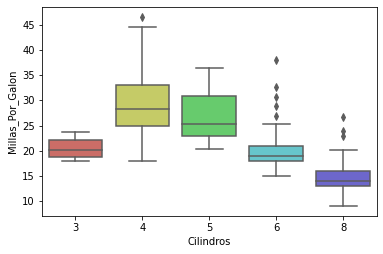

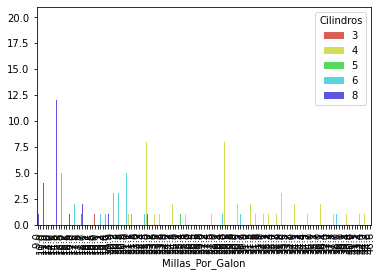

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


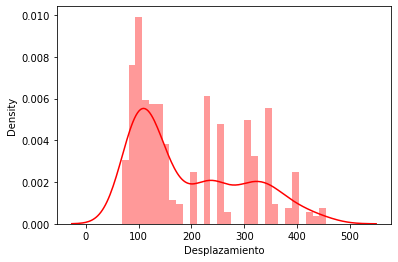

In [215]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


def graph_cajas(df, variable1,variable2):

  df= df.loc[:, [variable1, variable2]] 
  fig, ax = plt.subplots(figsize=(6, 3.84))
  sns.boxplot(
          x     = variable2,
          y     = variable1,
          data  = df,
          
      )


  return

def graph_bar(df, var1, var2):
  dfGraph= pd.crosstab(df[var1],df[var2])
  dfGraph.plot.bar()
  plt.show()
  return

  return
def graph_hist(df, var1):
  sns.set_palette ("hls") # Establezca el color de todas las imágenes, use el espacio de color hls
  sns.distplot(df[var1],color="r",bins=30,kde=True)
  plt.show()
  return

graph_cajas(df,"Millas_Por_Galon","Cilindros")
graph_bar(df,"Millas_Por_Galon","Cilindros")
graph_hist(df,"Desplazamiento")


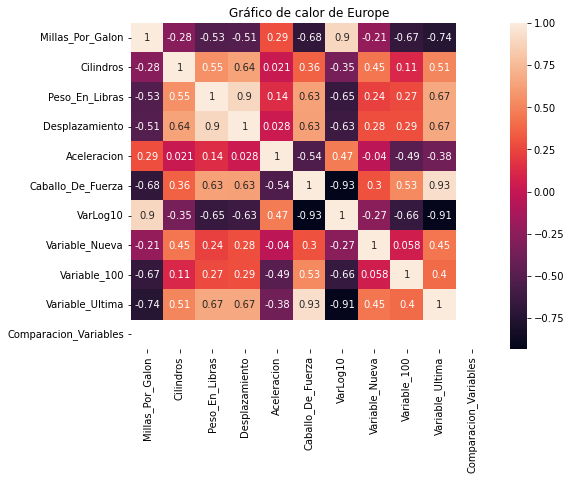

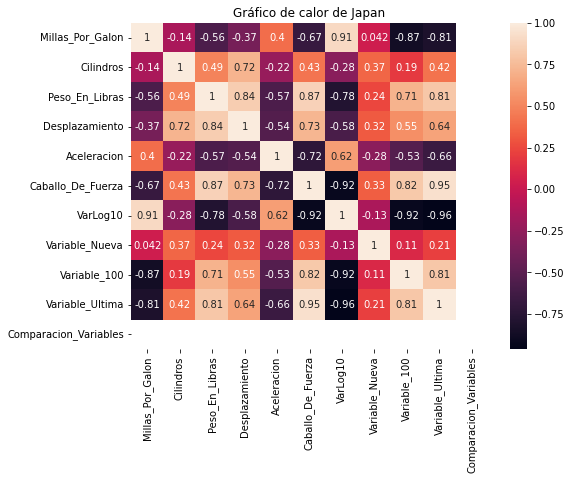

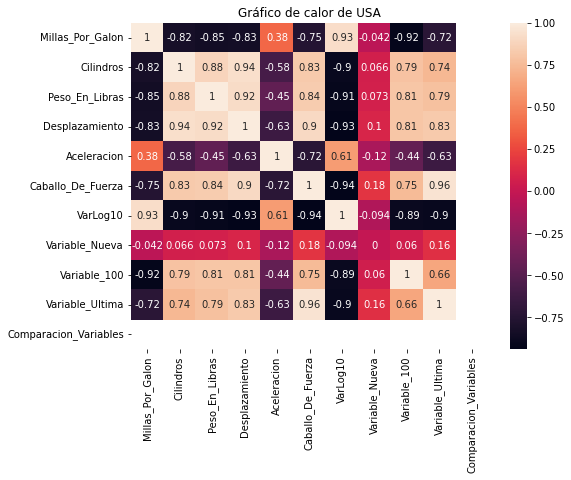

In [216]:
#Creación de gráfico de mapa de calor

def mapaCalor(df):
  df_Pais= df["Pais_Origen"]
  df_Pais.drop_duplicates()
  np_pais= df_Pais.to_numpy()
  listPais= np_pais.tolist()
  setPais= set(listPais)
  for i in setPais:
    
    in_pais = df['Pais_Origen'] == i
    df_pais = df[in_pais]
    plt.figure(figsize=(8,6))
    plt.title("Gráfico de calor de "+i)
    correlacion = df_pais.corr()
    sns.heatmap(correlacion,
                xticklabels = correlacion.columns.values,
                yticklabels = correlacion.columns.values,
                annot = True
                );
  return


mapaCalor(df)

  

GitHub: https://github.com/luanvarg/Proyecto2_DataAnalysis.git